<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=7px>
                    <b> Capstone Project <br> Cricket Win Prediction </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
#os.getcwd()
#os.chdir("C:\\Users\\Tejas A Lulla\\Downloads")

In [3]:
data_df= pd.read_excel("Sports Data.xlsx",sheet_name="Sports data for DSBA")
data_df.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [4]:
data_df=data_df.drop('Game_number',axis=1)

In [5]:
df1=data_df.copy()

In [6]:
df1.head()

,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,Summer,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,Summer,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,NaN,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,Summer,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,Summer,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2833.0,29.242852,2.264230,12.0,30.0,30.0,30.00,70.0
Bowlers_in_team,2848.0,2.913624,1.023907,1.0,2.0,3.0,4.00,5.0
Wicket_keeper_in_team,2930.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
All_rounder_in_team,2890.0,2.722491,1.092699,1.0,2.0,3.0,4.00,4.0
Audience_number,2849.0,46267.960688,48599.581459,7063.0,20363.0,34349.0,57876.00,1399930.0
Max_run_scored_1over,2902.0,15.199862,3.661010,11.0,12.0,14.0,18.00,25.0
Max_wicket_taken_1over,2930.0,2.713993,1.080623,1.0,2.0,3.0,4.00,4.0
Extra_bowls_bowled,2901.0,11.252671,7.780829,0.0,6.0,10.0,15.00,40.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.00,6.0
Min_run_scored_1over,2903.0,2.762659,0.705759,1.0,2.0,3.0,3.00,4.0


In [8]:
df1.isnull().sum()

Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Result                  2930 non-null   object 
 1   Avg_team_Age            2833 non-null   float64
 2   Match_light_type        2878 non-null   object 
 3   Match_format            2860 non-null   object 
 4   Bowlers_in_team         2848 non-null   float64
 5   Wicket_keeper_in_team   2930 non-null   int64  
 6   All_rounder_in_team     2890 non-null   float64
 7   First_selection         2871 non-null   object 
 8   Opponent                2894 non-null   object 
 9   Season                  2868 non-null   object 
 10  Audience_number         2849 non-null   float64
 11  Offshore                2866 non-null   object 
 12  Max_run_scored_1over    2902 non-null   float64
 13  Max_wicket_taken_1over  2930 non-null   int64  
 14  Extra_bowls_bowled      2901 non-null   

In [10]:
dups=df1.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df1[dups]

Total no of duplicate values = 852


,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
9,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,Summer,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
12,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,Summer,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1
13,Win,24.0,Night,ODI,3.0,1,4.0,Batting,Srilanka,Summer,...,15.0,3,0.0,5,4.0,6.0,0,97.0,3,1
14,Loss,24.0,Day and Night,T20,2.0,1,2.0,Batting,Zimbabwe,Summer,...,12.0,3,0.0,0,4.0,6.0,0,70.0,3,1
15,Win,24.0,Night,ODI,3.0,1,2.0,Batting,Kenya,Summer,...,16.0,3,0.0,4,1.0,6.0,0,33.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,Win,30.0,Day,ODI,3.0,1,4.0,Bowling,Kenya,Summer,...,14.0,4,4.0,4,3.0,6.0,2,78.0,3,1
2922,Win,30.0,Day,T20,2.0,1,1.0,Batting,South Africa,Rainy,...,11.0,3,10.0,0,3.0,10.0,7,100.0,3,2
2924,Win,30.0,Day,T20,4.0,1,2.0,Batting,South Africa,Rainy,...,13.0,1,8.0,0,2.0,6.0,3,100.0,2,2
2926,Win,30.0,Day,ODI,4.0,1,3.0,Bowling,Kenya,Summer,...,14.0,4,8.0,2,3.0,6.0,2,52.0,2,1


In [11]:
df1.shape

(2930, 22)

In [12]:
print("the no. of rows ",df1.shape[0]," ", "the no. of columns ",df1.shape[1])

the no. of rows  2930   the no. of columns  22


In [13]:
df1.dtypes

Result                     object
Avg_team_Age              float64
Match_light_type           object
Match_format               object
Bowlers_in_team           float64
Wicket_keeper_in_team       int64
All_rounder_in_team       float64
First_selection            object
Opponent                   object
Season                     object
Audience_number           float64
Offshore                   object
Max_run_scored_1over      float64
Max_wicket_taken_1over      int64
Extra_bowls_bowled        float64
Min_run_given_1over         int64
Min_run_scored_1over      float64
Max_run_given_1over       float64
extra_bowls_opponent        int64
player_highest_run        float64
Players_scored_zero        object
player_highest_wicket      object
dtype: object

In [14]:
df1_num = df1.select_dtypes(include=np.number)
df1_num.shape

(2930, 13)

In [15]:
df1_cat = df1.select_dtypes(include='object')
df1_cat.shape

(2930, 9)

## Null Value Checks and Imputation:

In [16]:
df1['Avg_team_Age'] = df1['Avg_team_Age'].fillna(df1['Avg_team_Age'].mean())
df1['Bowlers_in_team'] = df1['Bowlers_in_team'].fillna(df1['Bowlers_in_team'].mean())

In [17]:
df1['First_selection'].isnull().sum()

59

In [18]:
df1['Match_format'] = df1['Match_format'].fillna(df1['Match_format'].value_counts().index[0])

In [19]:
df1['All_rounder_in_team'].isnull().sum()

40

In [20]:
df1['All_rounder_in_team'].value_counts()

3.0    892
4.0    877
2.0    563
1.0    558
Name: All_rounder_in_team, dtype: int64

In [21]:
df1['All_rounder_in_team'] = df1['All_rounder_in_team'].fillna(df1['All_rounder_in_team'].value_counts().index[0])

In [22]:
df1.isnull().sum()

Result                     0
Avg_team_Age               0
Match_light_type          52
Match_format               0
Bowlers_in_team            0
Wicket_keeper_in_team      0
All_rounder_in_team        0
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [23]:
df1['Audience_number'] = df1['Audience_number'].fillna(df1['Audience_number'].mean())
df1['Max_run_scored_1over'] = df1['Max_run_scored_1over'].fillna(df1['Max_run_scored_1over'].mean())
df1['Extra_bowls_bowled'] = df1['Extra_bowls_bowled'].fillna(df1['Extra_bowls_bowled'].mean())
df1['player_highest_run'] = df1['player_highest_run'].fillna(df1['player_highest_run'].mean())
df1['Max_run_given_1over'] = df1['Max_run_given_1over'].fillna(df1['Max_run_given_1over'].mean())
df1['Min_run_scored_1over'] = df1['Min_run_scored_1over'].fillna(df1['Min_run_scored_1over'].mean())

In [24]:
df1['Match_format'].value_counts().index[0]

'ODI'

In [25]:
df1['Match_light_type'] = df1['Match_light_type'].fillna(df1['All_rounder_in_team'].value_counts().index[0])
df1['First_selection'] = df1['First_selection'].fillna(df1['First_selection'].value_counts().index[0])
df1['Opponent'] = df1['Opponent'].fillna(df1['Opponent'].value_counts().index[0])
df1['Offshore'] = df1['Offshore'].fillna(df1['Offshore'].value_counts().index[0])
df1['Season'] = df1['Season'].fillna(df1['Season'].value_counts().index[0])

In [26]:
df1.isnull().sum()

Result                    0
Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
Wicket_keeper_in_team     0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64

## Univariate Analysis:

Text(0.5, 1.0, 'All_rounder_in_team')

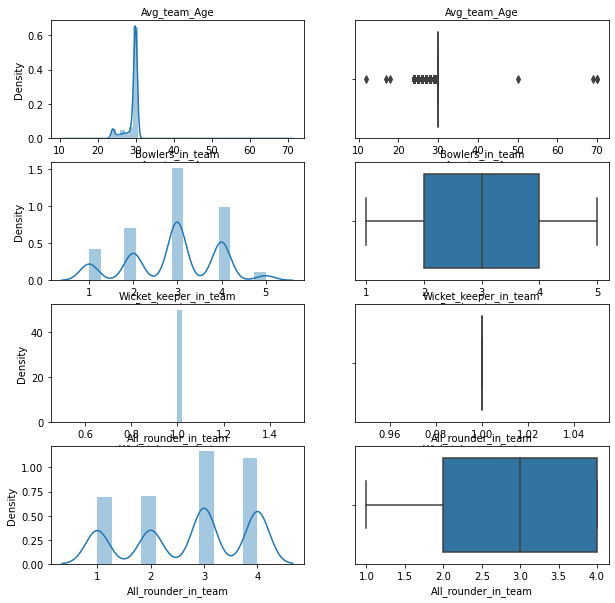

In [27]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,10)
a = sns.distplot(df1['Avg_team_Age'] , ax=axes[0][0])
a.set_title("Avg_team_Age",fontsize=10)

a = sns.boxplot(df1['Avg_team_Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Avg_team_Age",fontsize=10)

a=sns.distplot(df1['Bowlers_in_team'], ax=axes[1][0])
a.set_title("Bowlers_in_team",fontsize=10)

a=sns.boxplot(df1['Bowlers_in_team'],orient="v", ax=axes[1][1])
a.set_title("Bowlers_in_team", fontsize=10)

a=sns.distplot(df1['Wicket_keeper_in_team'], ax=axes[2][0])
a.set_title("Wicket_keeper_in_team",fontsize=10)

a=sns.boxplot(df1['Wicket_keeper_in_team'],orient="v", ax=axes[2][1])
a.set_title("Wicket_keeper_in_team", fontsize=10)

a=sns.distplot(df1['All_rounder_in_team'], ax=axes[3][0])
a.set_title("All_rounder_in_team",fontsize=10)

a=sns.boxplot(df1['All_rounder_in_team'],orient="v", ax=axes[3][1])
a.set_title("All_rounder_in_team", fontsize=10)

Text(0.5, 1.0, 'Extra_bowls_bowled')

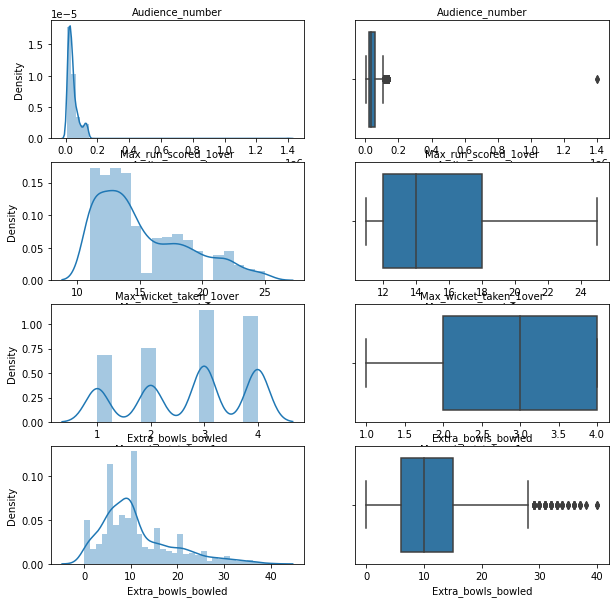

In [28]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,10)
a = sns.distplot(df1['Audience_number'] , ax=axes[0][0])
a.set_title("Audience_number",fontsize=10)

a = sns.boxplot(df1['Audience_number'] , orient = "v" , ax=axes[0][1])
a.set_title("Audience_number",fontsize=10)

a=sns.distplot(df1['Max_run_scored_1over'], ax=axes[1][0])
a.set_title("Max_run_scored_1over",fontsize=10)

a=sns.boxplot(df1['Max_run_scored_1over'],orient="v", ax=axes[1][1])
a.set_title("Max_run_scored_1over", fontsize=10)

a=sns.distplot(df1['Max_wicket_taken_1over'], ax=axes[2][0])
a.set_title("Max_wicket_taken_1over",fontsize=10)

a=sns.boxplot(df1['Max_wicket_taken_1over'],orient="v", ax=axes[2][1])
a.set_title("Max_wicket_taken_1over", fontsize=10)

a=sns.distplot(df1['Extra_bowls_bowled'], ax=axes[3][0])
a.set_title("Extra_bowls_bowled",fontsize=10)

a=sns.boxplot(df1['Extra_bowls_bowled'],orient="v", ax=axes[3][1])
a.set_title("Extra_bowls_bowled", fontsize=10)

Text(0.5, 1.0, 'extra_bowls_opponent')

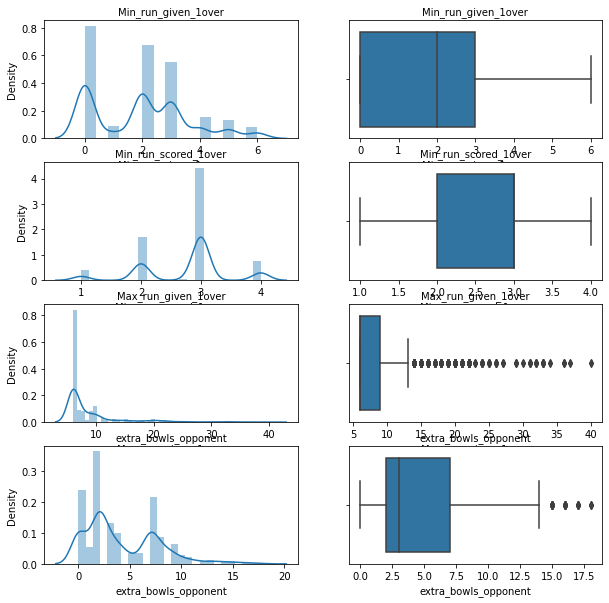

In [29]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,10)
a = sns.distplot(df1['Min_run_given_1over'] , ax=axes[0][0])
a.set_title("Min_run_given_1over",fontsize=10)

a = sns.boxplot(df1['Min_run_given_1over'] , orient = "v" , ax=axes[0][1])
a.set_title("Min_run_given_1over",fontsize=10)

a=sns.distplot(df1['Min_run_scored_1over'], ax=axes[1][0])
a.set_title("Min_run_scored_1over",fontsize=10)

a=sns.boxplot(df1['Min_run_scored_1over'],orient="v", ax=axes[1][1])
a.set_title("Min_run_scored_1over", fontsize=10)

a=sns.distplot(df1['Max_run_given_1over'], ax=axes[2][0])
a.set_title("Max_run_given_1over",fontsize=10)

a=sns.boxplot(df1['Max_run_given_1over'],orient="v", ax=axes[2][1])
a.set_title("Max_run_given_1over", fontsize=10)

a=sns.distplot(df1['extra_bowls_opponent'], ax=axes[3][0])
a.set_title("extra_bowls_opponent",fontsize=10)

a=sns.boxplot(df1['extra_bowls_opponent'],orient="v", ax=axes[3][1])
a.set_title("extra_bowls_opponent", fontsize=10)

In [30]:
df1.select_dtypes(include='object')

,Result,Match_light_type,Match_format,First_selection,Opponent,Season,Offshore,Players_scored_zero,player_highest_wicket
0,Loss,Day,ODI,Bowling,Srilanka,Summer,No,3,1
1,Win,Day,T20,Batting,Zimbabwe,Summer,No,2,1
2,Loss,Day and Night,T20,Bowling,Zimbabwe,Rainy,Yes,3,1
3,Win,3,ODI,Bowling,Kenya,Summer,No,3,1
4,Loss,Night,ODI,Bowling,Srilanka,Summer,No,3,1
...,...,...,...,...,...,...,...,...,...
2925,Win,Day,T20,Batting,South Africa,Summer,No,3,2
2926,Win,Day,ODI,Bowling,Kenya,Summer,No,2,1
2927,Win,Day and Night,ODI,Bowling,Pakistan,Rainy,Yes,3,2
2928,Win,Day,ODI,Batting,Kenya,Rainy,No,3,1


<AxesSubplot:xlabel='player_highest_run', ylabel='Density'>

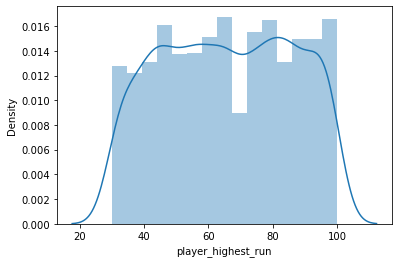

In [31]:
sns.distplot(df1['player_highest_run'])

<AxesSubplot:xlabel='player_highest_run'>

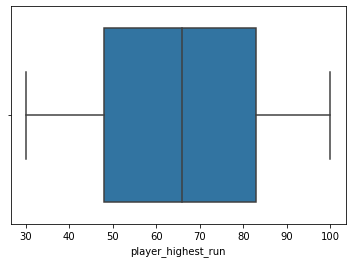

In [32]:
sns.boxplot(df1['player_highest_run'])

In [33]:
df1.columns

Index(['Result', 'Avg_team_Age', 'Match_light_type', 'Match_format',
       'Bowlers_in_team', 'Wicket_keeper_in_team', 'All_rounder_in_team',
       'First_selection', 'Opponent', 'Season', 'Audience_number', 'Offshore',
       'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled',
       'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over',
       'extra_bowls_opponent', 'player_highest_run', 'Players_scored_zero',
       'player_highest_wicket'],
      dtype='object')

## Bivariate Analysis:

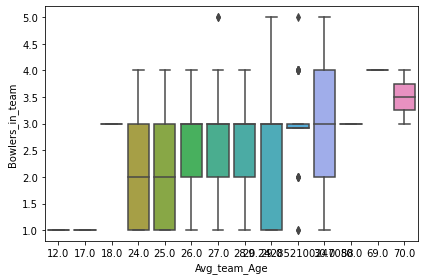

In [34]:
sns.boxplot(df1['Avg_team_Age'],df1['Bowlers_in_team'])
plt.tight_layout()
plt.show()

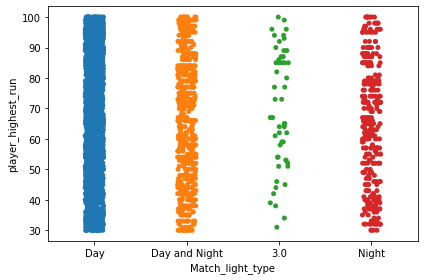

In [35]:
sns.stripplot(df1['Match_light_type'],df1['player_highest_run'])
plt.tight_layout()
plt.show()

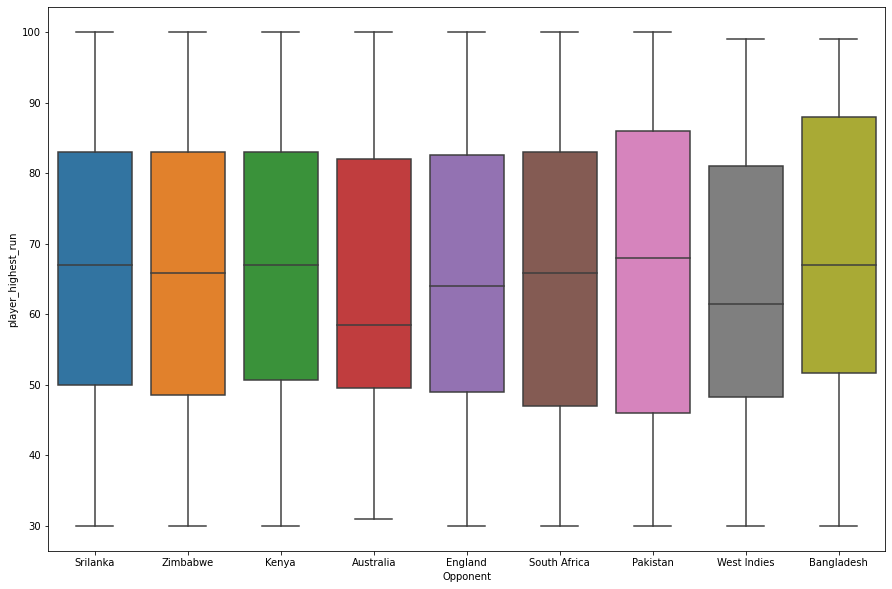

In [36]:
plt.rcParams["figure.figsize"] = [15,10]
sns.boxplot(df1['Opponent'],df1['player_highest_run'])
plt.show()

## Detecting Outliers:

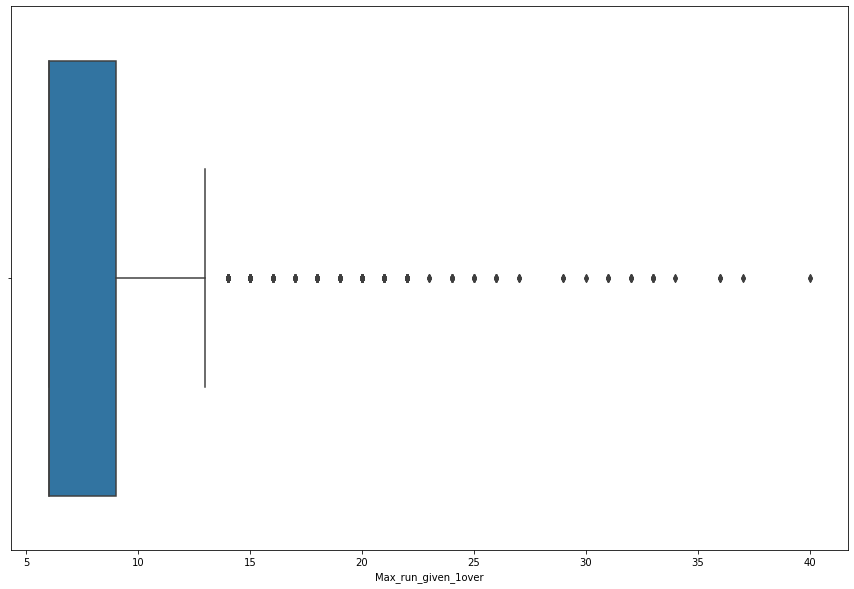

In [37]:
sns.boxplot(df1['Max_run_given_1over'])
plt.show()

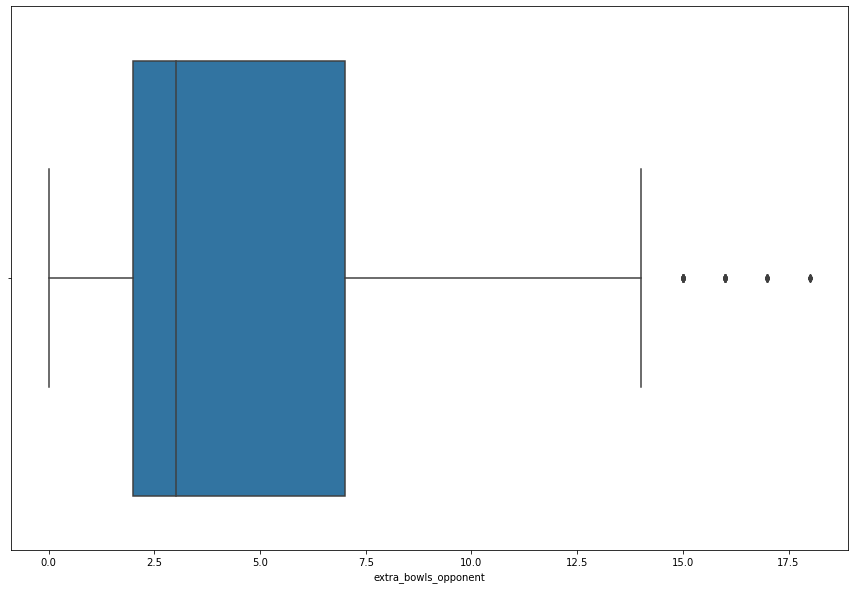

In [38]:
sns.boxplot(df1['extra_bowls_opponent'])
plt.show()

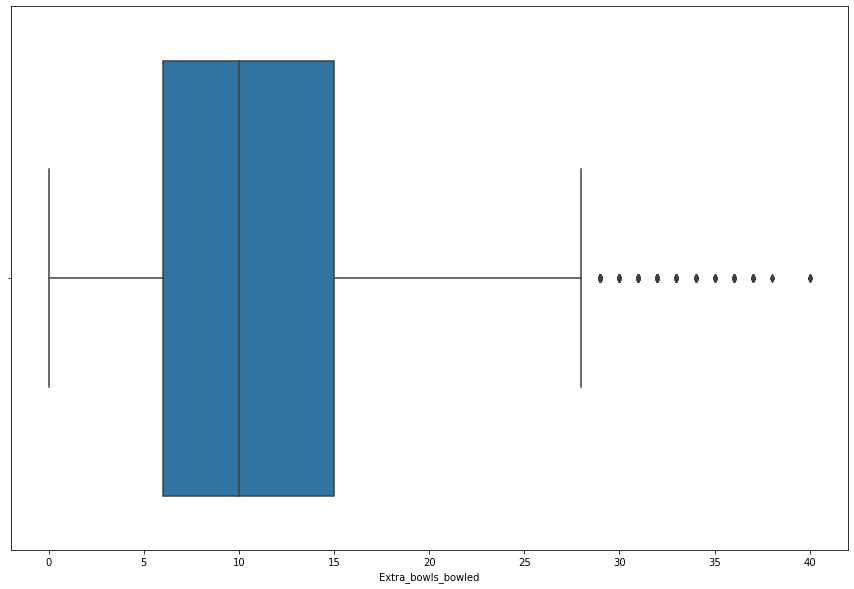

In [39]:
sns.boxplot(df1['Extra_bowls_bowled'])
plt.show()

In [40]:
q3 = df1['Audience_number'].quantile(0.75)
q1 = df1['Audience_number'].quantile(0.25)
iqr = q3 - q1

In [41]:
ub = q3 + (1.5 * iqr)
lb = q1 - (1.5 * iqr)

In [42]:
# Removing the outliers

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [43]:
lratio,uratio=remove_outlier(df1['Audience_number'])
df1['Audience_number']=np.where(df1['Audience_number']>uratio,uratio,df1['Audience_number'])
df1['Audience_number']=np.where(df1['Audience_number']<lratio,lratio,df1['Audience_number'])

df1['extra_bowls_opponent']=np.where(df1['extra_bowls_opponent']>uratio,uratio,df1['extra_bowls_opponent'])
df1['extra_bowls_opponent']=np.where(df1['extra_bowls_opponent']<lratio,lratio,df1['extra_bowls_opponent'])

df1['Avg_team_Age']=np.where(df1['Avg_team_Age']>uratio,uratio,df1['Avg_team_Age'])
df1['Avg_team_Age']=np.where(df1['Avg_team_Age']<lratio,lratio,df1['Avg_team_Age'])

df1['Max_run_given_1over']=np.where(df1['Max_run_given_1over']>uratio,uratio,df1['Max_run_given_1over'])
df1['Max_run_given_1over']=np.where(df1['Max_run_given_1over']<lratio,lratio,df1['Max_run_given_1over'])

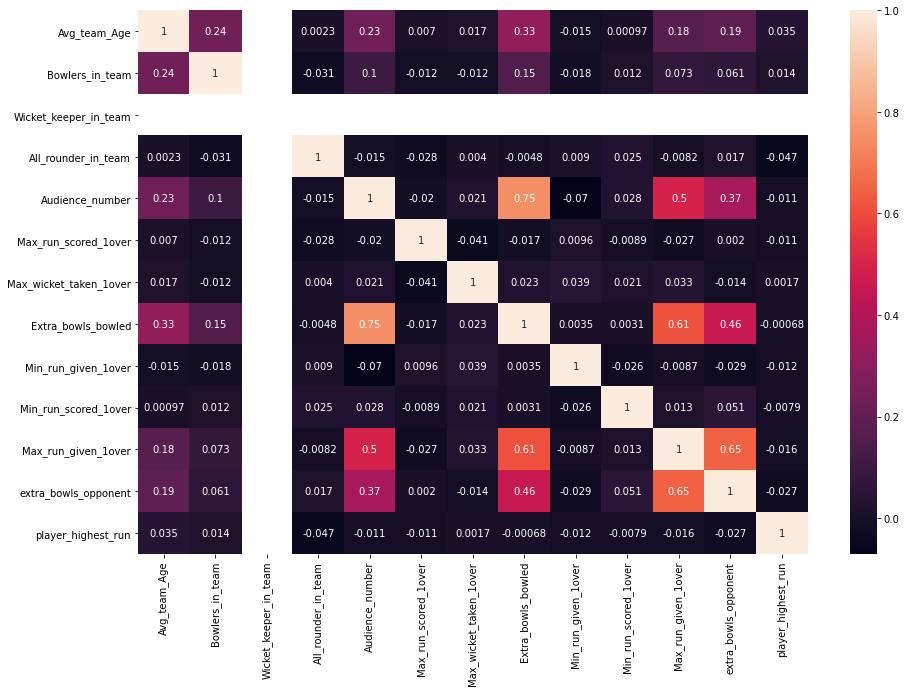

In [44]:
sns.heatmap(df1.corr(),annot=True,annot_kws={'size':10})
plt.show()

#### 2nd part (Note for Self)

In [45]:
df1.skew().sort_values(ascending=False)

Avg_team_Age              5.129205
Max_run_given_1over       2.688539
Extra_bowls_bowled        1.128101
Audience_number           1.084842
extra_bowls_opponent      0.916295
Max_run_scored_1over      0.831084
Min_run_given_1over       0.433859
Wicket_keeper_in_team     0.000000
player_highest_run       -0.031315
Bowlers_in_team          -0.296492
Max_wicket_taken_1over   -0.305597
All_rounder_in_team      -0.335012
Min_run_scored_1over     -0.560710
dtype: float64

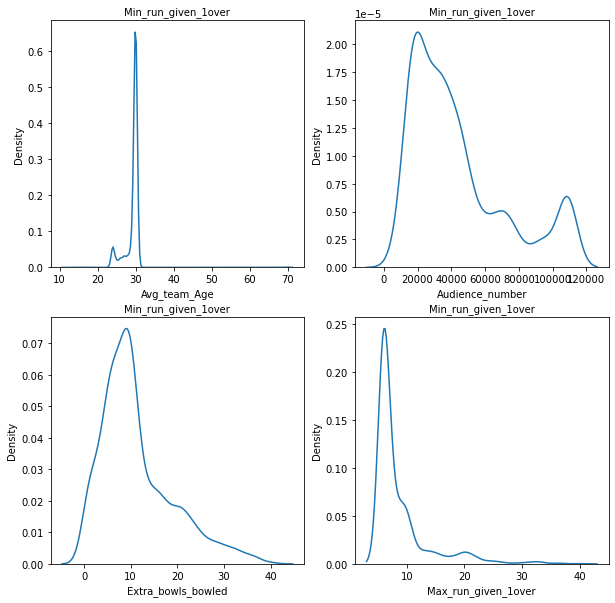

In [46]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)
a = sns.kdeplot(df1['Avg_team_Age'], ax=axes[0][0])
a.set_title("Min_run_given_1over",fontsize=10)

a = sns.kdeplot(df1['Audience_number'], ax=axes[0][1])
a.set_title("Min_run_given_1over",fontsize=10)

a = sns.kdeplot(df1['Extra_bowls_bowled'], ax=axes[1][0])
a.set_title("Min_run_given_1over",fontsize=10)

a = sns.kdeplot(df1['Max_run_given_1over'], ax=axes[1][1])
a.set_title("Min_run_given_1over",fontsize=10)

plt.show()

In [47]:
df1[['Avg_team_Age','Audience_number','Extra_bowls_bowled','Max_run_given_1over']].skew()

Avg_team_Age           5.129205
Audience_number        1.084842
Extra_bowls_bowled     1.128101
Max_run_given_1over    2.688539
dtype: float64

In [48]:
df1['Avg_team_Age'] = np.log(df1['Avg_team_Age'])
df1['Audience_number'] = np.sqrt(df1['Audience_number'])
df1['Extra_bowls_bowled'] = np.sqrt(df1['Extra_bowls_bowled'])
df1['Max_run_given_1over'] = np.log(df1['Max_run_given_1over'])

In [49]:
df1[['Avg_team_Age','Audience_number','Extra_bowls_bowled','Max_run_given_1over']].skew()

Avg_team_Age          -0.434775
Audience_number        0.651524
Extra_bowls_bowled     0.173335
Max_run_given_1over    1.636920
dtype: float64

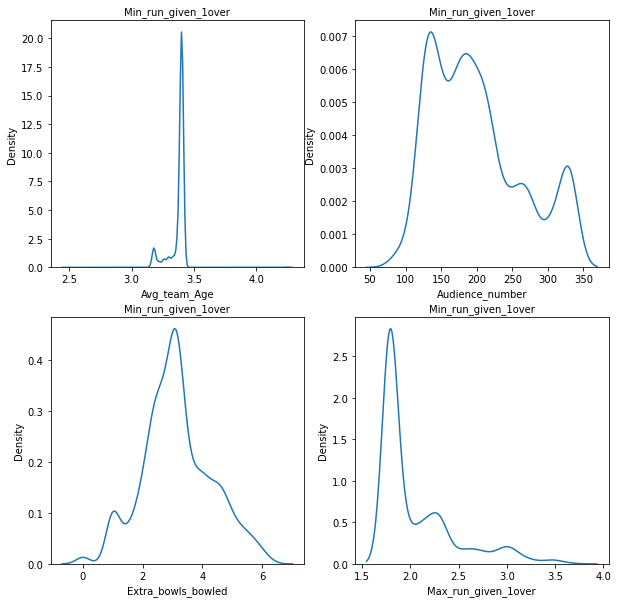

In [50]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)
a = sns.kdeplot(df1['Avg_team_Age'], ax=axes[0][0])
a.set_title("Min_run_given_1over",fontsize=10)

a = sns.kdeplot(df1['Audience_number'], ax=axes[0][1])
a.set_title("Min_run_given_1over",fontsize=10)

a = sns.kdeplot(df1['Extra_bowls_bowled'], ax=axes[1][0])
a.set_title("Min_run_given_1over",fontsize=10)

a = sns.kdeplot(df1['Max_run_given_1over'], ax=axes[1][1])
a.set_title("Min_run_given_1over",fontsize=10)

plt.show()

### Conversion of all categorical features:

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Result                  2930 non-null   object 
 1   Avg_team_Age            2930 non-null   float64
 2   Match_light_type        2930 non-null   object 
 3   Match_format            2930 non-null   object 
 4   Bowlers_in_team         2930 non-null   float64
 5   Wicket_keeper_in_team   2930 non-null   int64  
 6   All_rounder_in_team     2930 non-null   float64
 7   First_selection         2930 non-null   object 
 8   Opponent                2930 non-null   object 
 9   Season                  2930 non-null   object 
 10  Audience_number         2930 non-null   float64
 11  Offshore                2930 non-null   object 
 12  Max_run_scored_1over    2930 non-null   float64
 13  Max_wicket_taken_1over  2930 non-null   int64  
 14  Extra_bowls_bowled      2930 non-null   

In [52]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Result
['Loss', 'Win']
Categories (2, object): ['Loss', 'Win']
[0 1]


feature: Match_light_type
['Day', 'Day and Night', 3, 'Night']
Categories (4, object): [3, 'Day', 'Day and Night', 'Night']
[1 2 0 3]


feature: Match_format
['ODI', 'T20', 'Test', '20-20']
Categories (4, object): ['20-20', 'ODI', 'T20', 'Test']
[1 2 3 0]


feature: First_selection
['Bowling', 'Batting', 'Bat']
Categories (3, object): ['Bat', 'Batting', 'Bowling']
[2 1 0]


feature: Opponent
['Srilanka', 'Zimbabwe', 'Kenya', 'Australia', 'England', 'South Africa', 'Pakistan', 'West Indies', 'Bangladesh']
Categories (9, object): ['Australia', 'Bangladesh', 'England', 'Kenya', ..., 'South Africa', 'Srilanka', 'West Indies', 'Zimbabwe']
[6 8 3 0 2 5 4 7 1]


feature: Season
['Summer', 'Rainy', 'Winter']
Categories (3, object): ['Rainy', 'Summer', 'Winter']
[1 0 2]


feature: Offshore
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Players_scored_zero
[3, 2, 1, 4, 'Three']
Categories (5, 

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Result                  2930 non-null   int8   
 1   Avg_team_Age            2930 non-null   float64
 2   Match_light_type        2930 non-null   int8   
 3   Match_format            2930 non-null   int8   
 4   Bowlers_in_team         2930 non-null   float64
 5   Wicket_keeper_in_team   2930 non-null   int64  
 6   All_rounder_in_team     2930 non-null   float64
 7   First_selection         2930 non-null   int8   
 8   Opponent                2930 non-null   int8   
 9   Season                  2930 non-null   int8   
 10  Audience_number         2930 non-null   float64
 11  Offshore                2930 non-null   int8   
 12  Max_run_scored_1over    2930 non-null   float64
 13  Max_wicket_taken_1over  2930 non-null   int64  
 14  Extra_bowls_bowled      2930 non-null   

In [54]:
df1.head()

,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,0,2.890372,1,1,3.0,1,3.0,2,6,1,...,13.0,3,0.0,2,3.0,1.791759,0.0,54.0,2,0
1,1,3.178054,1,2,3.0,1,4.0,1,8,1,...,12.0,1,0.0,0,3.0,1.791759,0.0,69.0,1,0
2,0,3.178054,2,2,3.0,1,2.0,2,8,0,...,14.0,4,0.0,0,3.0,1.791759,0.0,69.0,2,0
3,1,3.178054,0,1,2.0,1,2.0,2,3,1,...,15.0,4,0.0,2,3.0,1.791759,0.0,73.0,2,0
4,0,3.178054,3,1,1.0,1,3.0,2,6,1,...,12.0,4,0.0,0,3.0,1.791759,0.0,80.0,2,0


In [55]:
X = df1.drop(['Result'], axis = 1)
y = df1.Result

In [56]:
X.shape, y.shape

((2930, 21), (2930,))

## Class Imbalance

In [57]:
df1['Result'].value_counts()

1    2457
0     473
Name: Result, dtype: int64

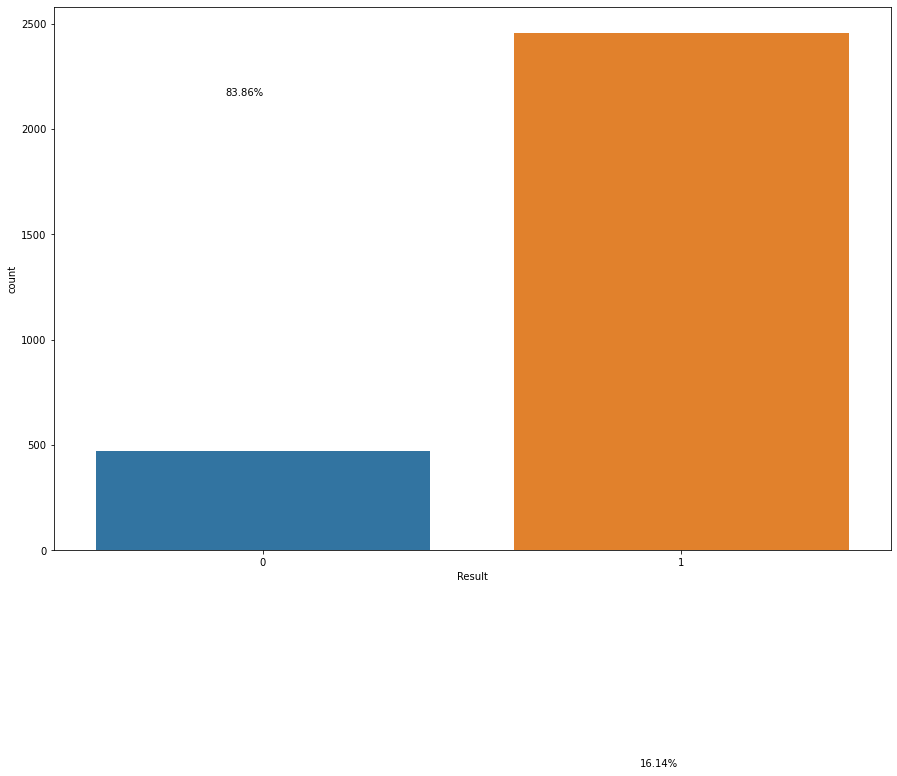

In [58]:
sns.countplot(df1['Result'])
plt.text(x = 0.90, y = df1['Result'].value_counts()[0] - 1500, s = str(round((df1['Result'].value_counts()[0])*100/len(df1['Result']),2)) + '%')
plt.text(x = -0.09, y = df1['Result'].value_counts()[1] - 300, s = str(round((df1['Result'].value_counts()[1])*100/len(df1['Result']),2)) + '%')
plt.show()

In [59]:
X.columns

Index(['Avg_team_Age', 'Match_light_type', 'Match_format', 'Bowlers_in_team',
       'Wicket_keeper_in_team', 'All_rounder_in_team', 'First_selection',
       'Opponent', 'Season', 'Audience_number', 'Offshore',
       'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled',
       'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over',
       'extra_bowls_opponent', 'player_highest_run', 'Players_scored_zero',
       'player_highest_wicket'],
      dtype='object')

In [60]:
print('Before Smote independent variable shape',X.shape)
print('Before Smote target variable shape',y.shape)

Before Smote independent variable shape (2930, 21)
Before Smote target variable shape (2930,)


### SMOTE Analysis:

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)

X_sm, y_sm=smote.fit_resample(X, y)

In [62]:
print('After Smote independent variable shape',X_sm.shape)
print('After Smote target variable shape',y_sm.shape)

After Smote independent variable shape (4914, 21)
After Smote target variable shape (4914,)


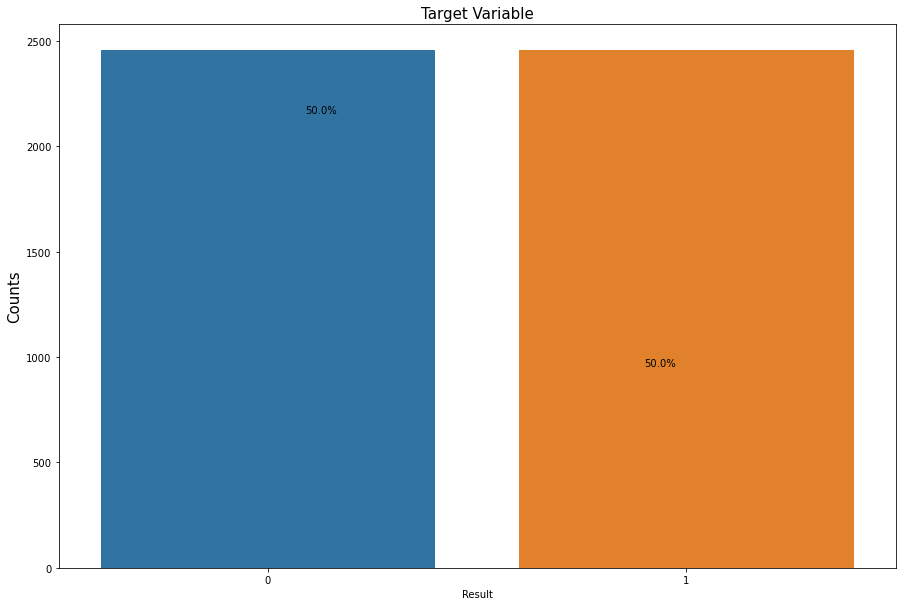

In [63]:
sns.countplot(y_sm)
plt.text(x = 0.90, y = y_sm.value_counts()[0] - 1500, s = str(round((y_sm.value_counts()[0])*100/len(y_sm),2)) + '%')
plt.text(x = 0.09, y = y_sm.value_counts()[1] - 300, s = str(round((y_sm.value_counts()[1])*100/len(y_sm),2)) + '%')
plt.title("Target Variable", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.show()

In [64]:
X_sm=pd.DataFrame(X_sm,columns=X.columns)
X_sm.head(2)

,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,2.890372,1,1,3.0,1,3.0,2,6,1,99.699549,...,13.0,3,0.0,2,3.0,1.791759,0.0,54.0,2,0
1,3.178054,1,2,3.0,1,4.0,1,8,1,91.651514,...,12.0,1,0.0,0,3.0,1.791759,0.0,69.0,1,0


In [65]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, classification_report, precision_score, roc_curve, roc_auc_score

%matplotlib inline
from matplotlib.colors import ListedColormap

In [66]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_sm)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state = 10, test_size = 0.3)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3439, 21)
y_train (3439,)
X_test (1475, 21)
y_test (1475,)


## Logistic Regression

In [68]:
logreg = sm.Logit(y_train, X_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.503035
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                 3439
Model:                          Logit   Df Residuals:                     3418
Method:                           MLE   Df Model:                           20
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                  0.2740
Time:                        18:53:18   Log-Likelihood:                -1729.9
converged:                       True   LL-Null:                       -2382.9
Covariance Type:            nonrobust   LLR p-value:                1.570e-264
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Avg_team_Age               2.7606      0.724      3.811      0.000       1.341      

In [69]:
y_pred_prob = logreg.predict(X_test)

y_pred_prob.head()

2067    0.592022
1053    0.653213
88      0.542052
3931    0.371903
3648    0.158662
dtype: float64

In [70]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

[1, 1, 1, 0, 0]

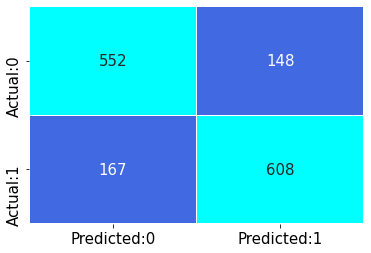

In [71]:
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap=ListedColormap(['royalblue', 'cyan']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [72]:
acc_table = classification_report(y_test, y_pred)

print(acc_table)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       700
           1       0.80      0.78      0.79       775

    accuracy                           0.79      1475
   macro avg       0.79      0.79      0.79      1475
weighted avg       0.79      0.79      0.79      1475



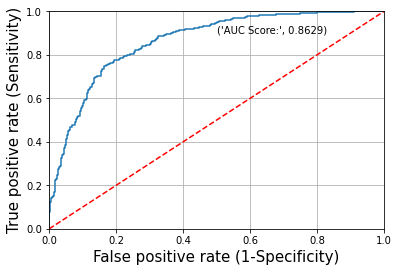

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.5, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))

plt.grid(True)

### Identify the Best Cut-off Value

### Cost Based method

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state = 10, test_size = 0.3)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3439, 21)
y_train (3439,)
X_test (1475, 21)
y_test (1475,)


In [75]:
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    cm = confusion_matrix(actual_value, predicted_value)           
    
    cm_array = np.array(cm)
    
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

i = 0

for cut_off in range(10, 100):
    total_cost = calculate_total_cost(y_test,  y_pred_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 3.5, 2) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 

    i += 1

In [76]:
df_total_cost.sort_values('total_cost', ascending = True).head(10)

,cut-off,total_cost
29,0.39,778.0
28,0.38,778.5
26,0.36,779.0
25,0.35,781.0
24,0.34,781.5
27,0.37,788.0
30,0.40,788.0
31,0.41,799.5
23,0.33,804.0
32,0.42,813.0


In [77]:
df_total_cost['cut-off'].mean()

0.5449999999999999

In [78]:
y_pred_cost = [ 0 if x < 0.55 else 1 for x in y_pred_prob]

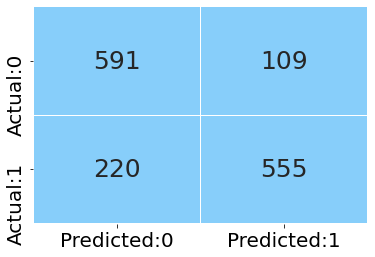

In [79]:
cm = confusion_matrix(y_test, y_pred_cost)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [80]:
acc_table = classification_report(y_test, y_pred_cost)

print(acc_table)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       700
           1       0.84      0.72      0.77       775

    accuracy                           0.78      1475
   macro avg       0.78      0.78      0.78      1475
weighted avg       0.79      0.78      0.78      1475



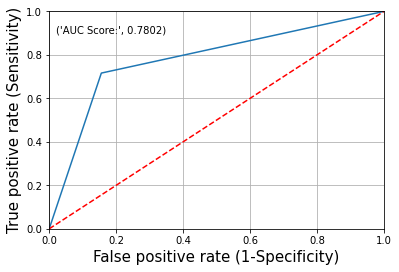

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cost)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_cost),4)))

plt.grid(True)

### Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier  

classifier= DecisionTreeClassifier(criterion='entropy', random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [83]:
y_pred= classifier.predict(X_test)  

In [84]:
classifier.score(X_train,y_train)

1.0

In [85]:
classifier.score(X_test,y_test)

0.9403389830508475

In [86]:
result = classification_report(y_test, y_pred)

print(result)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       700
           1       0.97      0.92      0.94       775

    accuracy                           0.94      1475
   macro avg       0.94      0.94      0.94      1475
weighted avg       0.94      0.94      0.94      1475



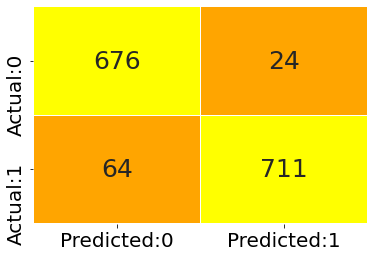

In [87]:
cm= confusion_matrix(y_test, y_pred)  

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange','yellow']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

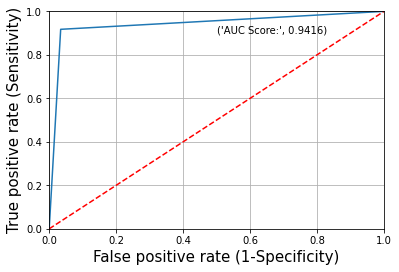

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.5, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))

plt.grid(True)

In [89]:
df_dt=pd.DataFrame()

In [90]:
df_dt['Features']=X_sm.columns

In [91]:
df_dt['Importance']=classifier.feature_importances_

In [92]:
df_dt.sort_values('Importance',ascending=False)

,Features,Importance
0,Avg_team_Age,0.138568
5,All_rounder_in_team,0.122895
18,player_highest_run,0.121616
17,extra_bowls_opponent,0.076306
15,Min_run_scored_1over,0.061835
9,Audience_number,0.060880
14,Min_run_given_1over,0.059293
11,Max_run_scored_1over,0.046196
13,Extra_bowls_bowled,0.044553
10,Offshore,0.040967


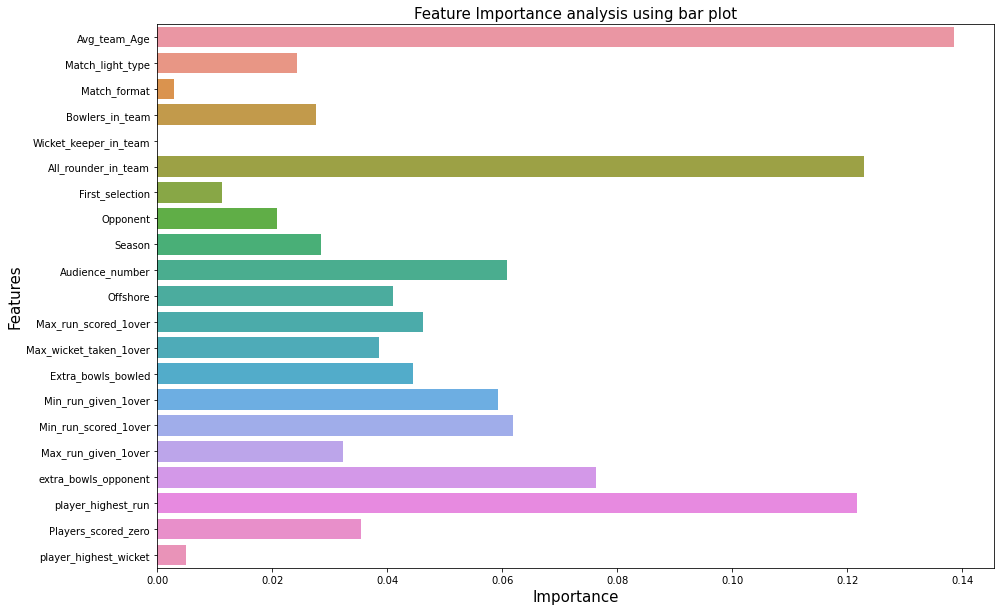

In [93]:
plt.rcParams['figure.figsize']=[15,10]
sns.barplot(df_dt['Importance'],df_dt['Features'], orient='h')
plt.xlabel("Importance", fontsize=15)
plt.ylabel("Features", fontsize=15)
plt.title("Feature Importance analysis using bar plot", fontsize=15)
plt.show()

### Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [96]:
y_train_predict= NB_model.predict(X_train)

model_score=NB_model.score(X_train, y_train)

print(model_score)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.701948240767665
[[676  24]
 [ 64 711]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       700
           1       0.97      0.92      0.94       775

    accuracy                           0.94      1475
   macro avg       0.94      0.94      0.94      1475
weighted avg       0.94      0.94      0.94      1475



the auc 0.776 


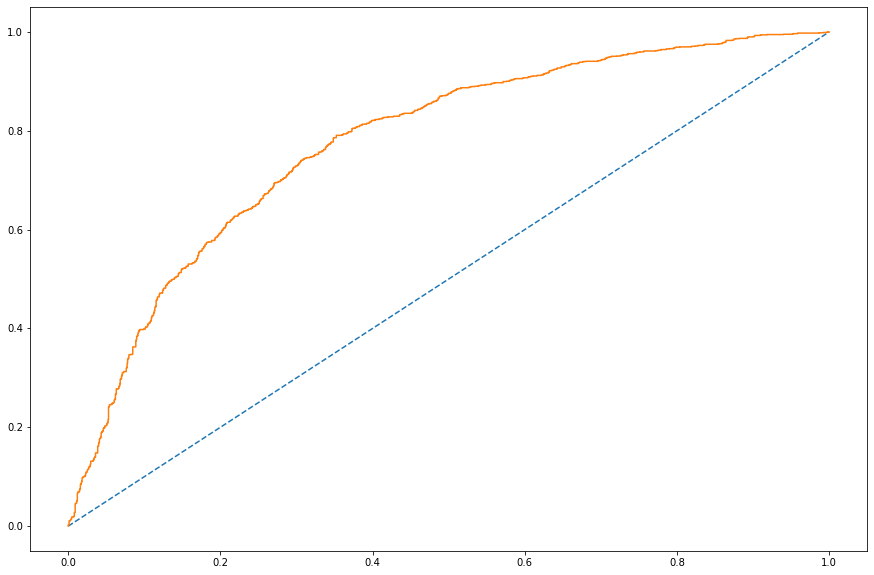

In [97]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [98]:
y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)

print(model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.7254237288135593
[[549 151]
 [254 521]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       700
           1       0.78      0.67      0.72       775

    accuracy                           0.73      1475
   macro avg       0.73      0.73      0.73      1475
weighted avg       0.73      0.73      0.73      1475



the auc curve 0.800 


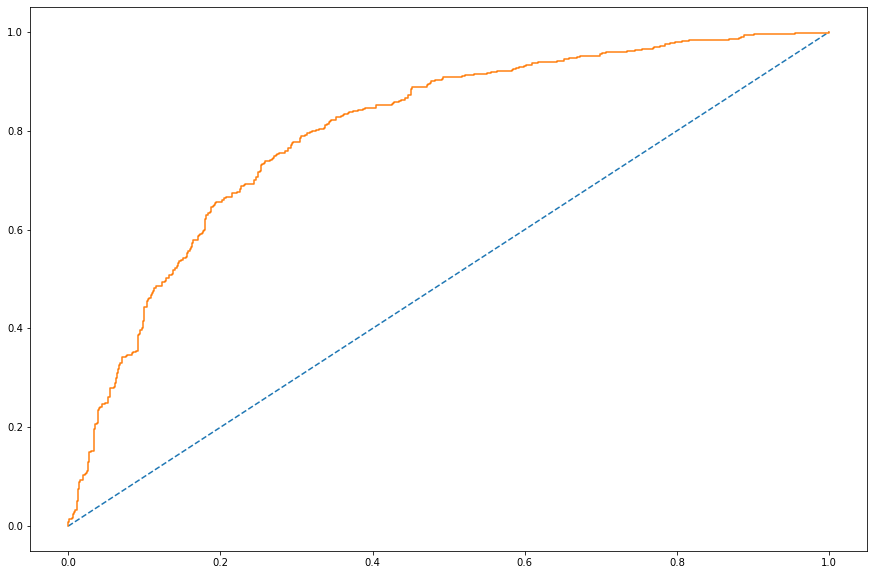

In [99]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=50,random_state=1)

In [101]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [102]:
y_pred_rf=model.predict(X_test)
y_pred_rf

array([1, 0, 0, ..., 0, 1, 1], dtype=int8)

In [103]:
model.score(X_train,y_train)

1.0

In [104]:
model.score(X_test,y_test)

0.9810169491525423

In [105]:
result = classification_report(y_test, y_pred_rf)

print(result)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       700
           1       0.99      0.97      0.98       775

    accuracy                           0.98      1475
   macro avg       0.98      0.98      0.98      1475
weighted avg       0.98      0.98      0.98      1475



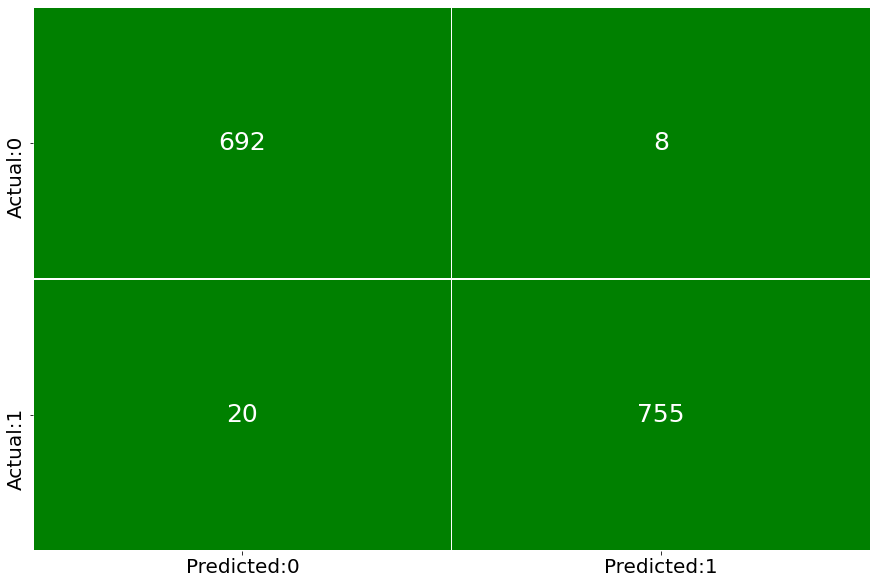

In [106]:
cm= confusion_matrix(y_test, y_pred_rf)  

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['Green']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

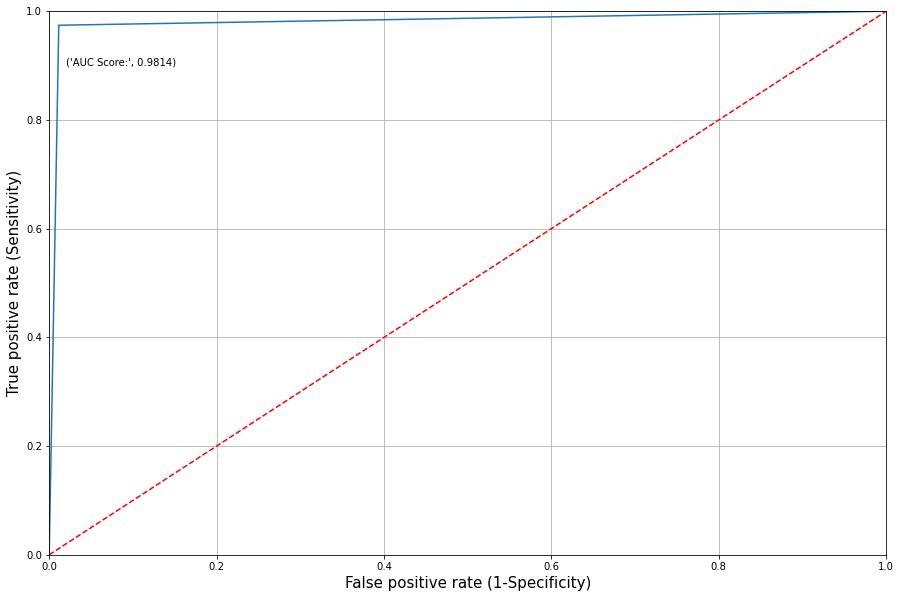

In [107]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_rf),4)))

plt.grid(True)

In [108]:
df_rf=pd.DataFrame()

In [109]:
df_rf['Features']=X_sm.columns

In [110]:
df_rf['Importance']=model.feature_importances_

In [111]:
df_rf.sort_values('Importance',ascending=False)

,Features,Importance
9,Audience_number,0.098509
5,All_rounder_in_team,0.073119
17,extra_bowls_opponent,0.069996
18,player_highest_run,0.068516
13,Extra_bowls_bowled,0.066405
15,Min_run_scored_1over,0.065918
0,Avg_team_Age,0.065537
14,Min_run_given_1over,0.060165
11,Max_run_scored_1over,0.056208
3,Bowlers_in_team,0.055692


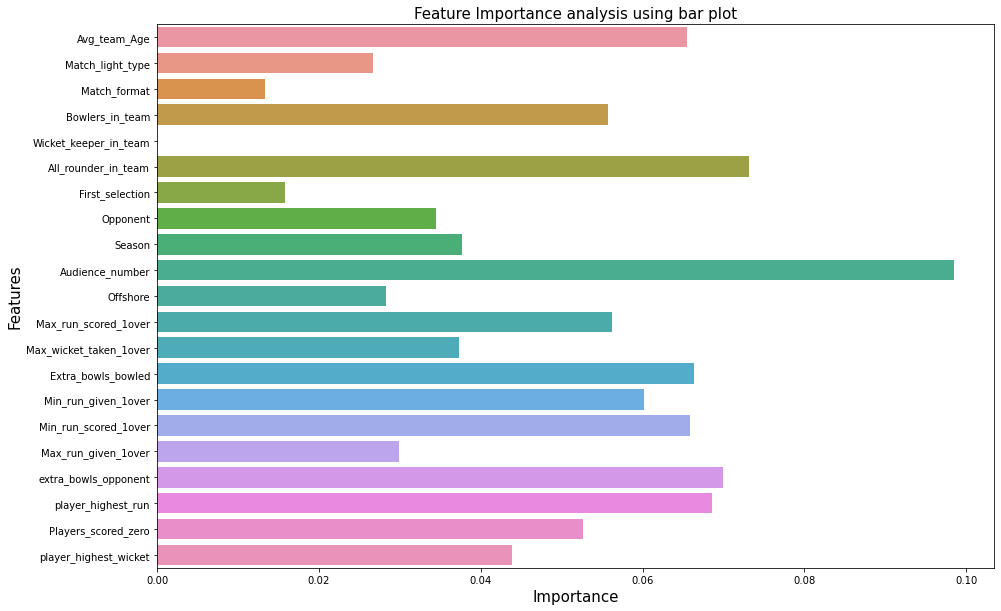

In [112]:
plt.rcParams['figure.figsize']=[15,10]
sns.barplot(df_rf['Importance'],df_rf['Features'],orient='h')
plt.xlabel("Importance", fontsize=15)
plt.ylabel("Features", fontsize=15)
plt.title("Feature Importance analysis using bar plot", fontsize=15)
plt.show()

## RandomForestClassifier with GridSearch

In [113]:
param_grid ={
    'max_depth': [10, 20, 30, 40,50,60,70],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [20, 40,60,80 ]
}

In [114]:
from sklearn.model_selection import GridSearchCV
RFclf = RandomForestClassifier(max_depth=10, n_estimators=20)
grid = GridSearchCV(estimator=RFclf, param_grid=param_grid, cv = 4, n_jobs=2,verbose=2)
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 4 folds for each of 56 candidates, totalling 224 fits
Best: 0.963074 using {'max_depth': 70, 'max_features': 'auto', 'n_estimators': 80}


In [115]:
RF=grid_result.best_estimator_
RF

RandomForestClassifier(max_depth=70, n_estimators=80)

In [116]:
Y_pred_RFclf=RF.predict(X_train)
score_RFclf = round(accuracy_score(Y_pred_RFclf,y_train)*100,2)
score_RFclf

100.0

In [117]:
Y_pred_RFclf=RF.predict(X_test)
score_RFclf = round(accuracy_score(Y_pred_RFclf,y_test)*100,2)
score_RFclf

98.44

In [118]:
result = classification_report(y_test, Y_pred_RFclf)

print(result)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       700
           1       0.99      0.98      0.99       775

    accuracy                           0.98      1475
   macro avg       0.98      0.98      0.98      1475
weighted avg       0.98      0.98      0.98      1475



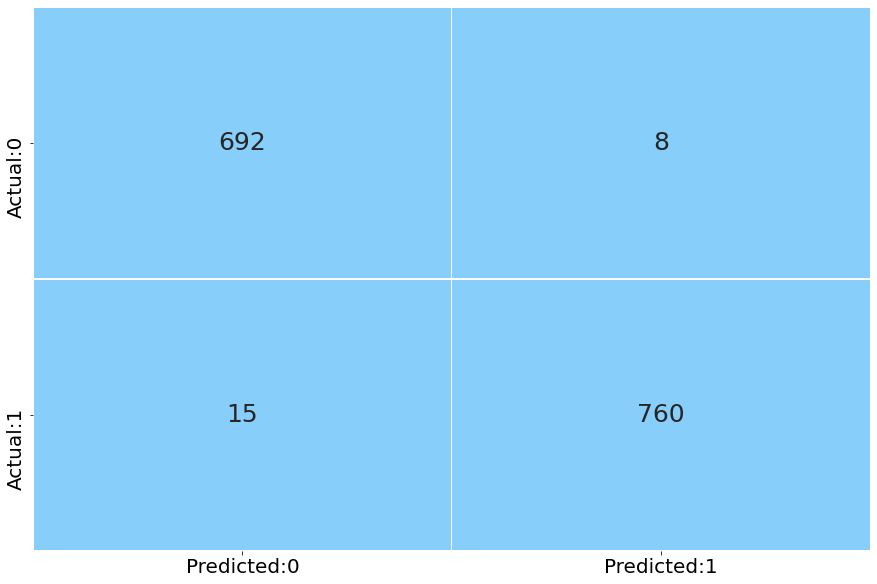

In [119]:
cm= confusion_matrix(y_test, Y_pred_RFclf)  

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

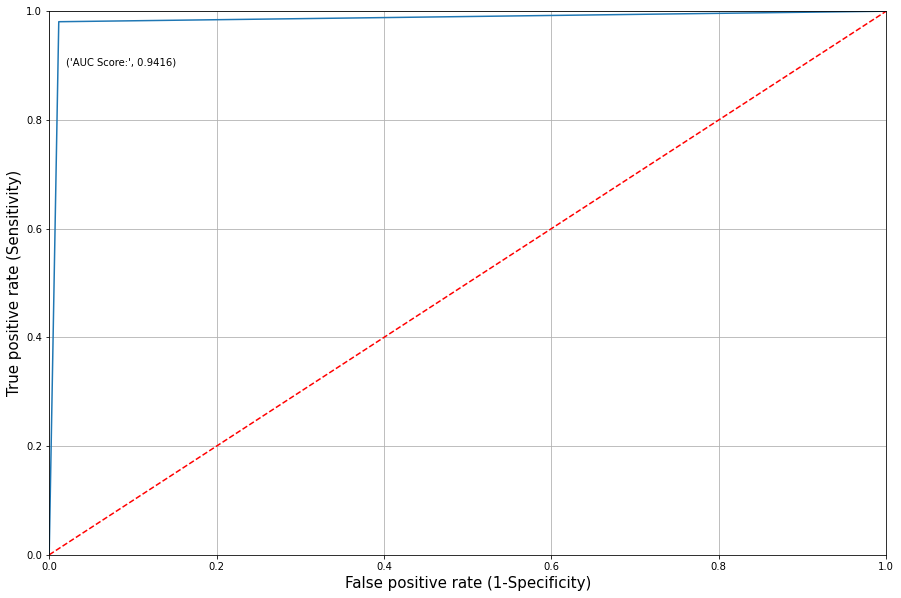

In [120]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_RFclf)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

plt.grid(True)

In [121]:
df_gs=pd.DataFrame()

In [122]:
df_gs['Features']=X_sm.columns

In [123]:
df_gs['Importance']=RF.feature_importances_

In [124]:
df_gs.sort_values('Importance',ascending=False)

,Features,Importance
9,Audience_number,0.101199
5,All_rounder_in_team,0.074524
13,Extra_bowls_bowled,0.073981
17,extra_bowls_opponent,0.070692
0,Avg_team_Age,0.070464
18,player_highest_run,0.069263
15,Min_run_scored_1over,0.062020
3,Bowlers_in_team,0.058129
11,Max_run_scored_1over,0.054740
14,Min_run_given_1over,0.053747


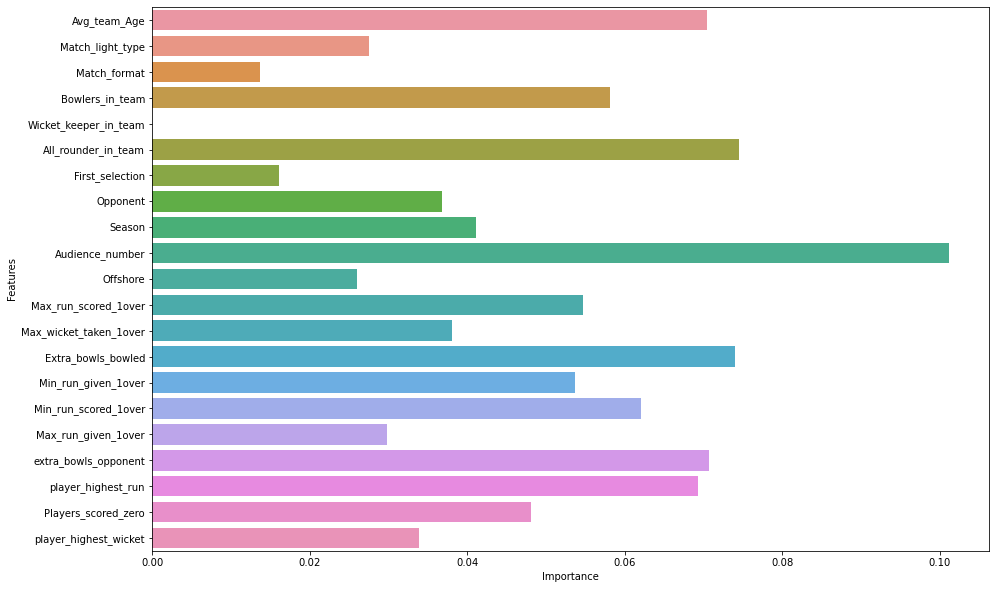

In [137]:
sns.barplot(df_gs['Importance'],df_gs['Features'])
plt.show()

## Model tuning

In [139]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(X_train,y_train)

Y_pred=clfRF.predict(X_test)
model_scoreRF = clfRF.score(X_test, y_test)

In [141]:
print(model_scoreRF)
print(metrics.confusion_matrix(y_test, y_pred))

0.9871186440677966
[[676  24]
 [ 64 711]]


### Bagging Train

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1)

In [145]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [147]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [150]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

1.0
[[ 329    0]
 [   0 1722]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051



### AUC _ROC Curve Bagging Train

AUC: 1.000


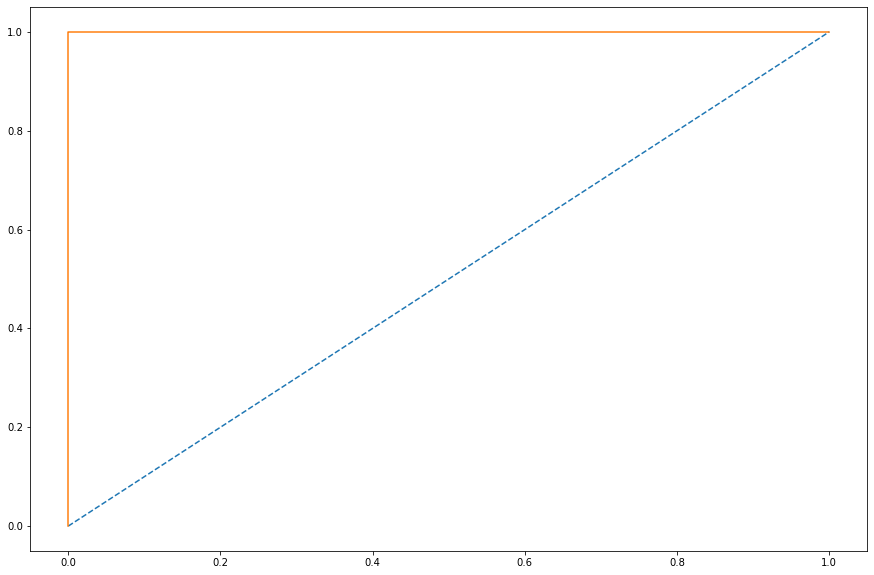

In [152]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### Bagging Test

In [154]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.9488054607508533
[[110  34]
 [ 11 724]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       144
           1       0.96      0.99      0.97       735

    accuracy                           0.95       879
   macro avg       0.93      0.87      0.90       879
weighted avg       0.95      0.95      0.95       879



### AUC _ROC Curve Bagging Test

AUC: 0.968


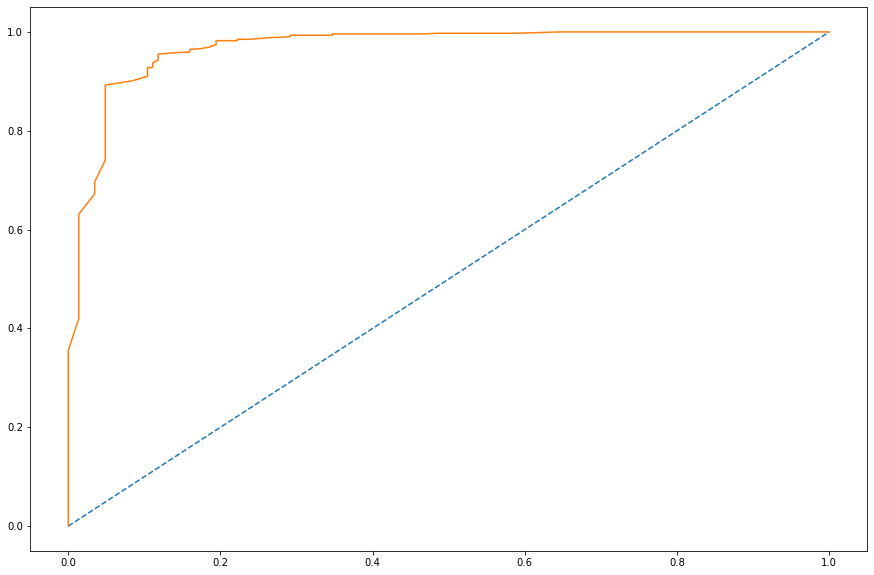

In [155]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Boosting Train

### Ada Boost

In [157]:
from sklearn.ensemble import AdaBoostClassifier

In [158]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [159]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8888347147732814
[[ 142  187]
 [  41 1681]]
              precision    recall  f1-score   support

           0       0.78      0.43      0.55       329
           1       0.90      0.98      0.94      1722

    accuracy                           0.89      2051
   macro avg       0.84      0.70      0.75      2051
weighted avg       0.88      0.89      0.88      2051



AUC: 0.896


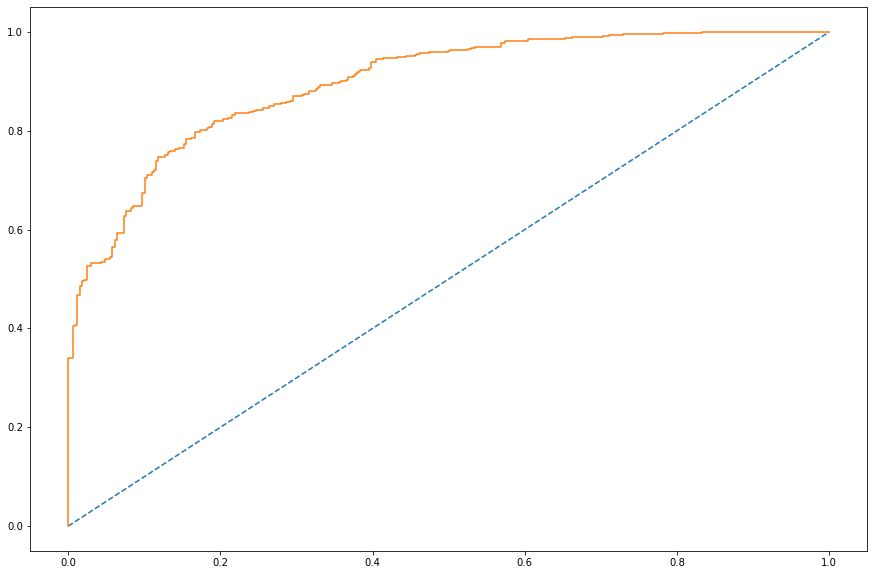

In [160]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### Gradient Boosting

In [161]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [162]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9268649439297904
[[ 187  142]
 [   8 1714]]
              precision    recall  f1-score   support

           0       0.96      0.57      0.71       329
           1       0.92      1.00      0.96      1722

    accuracy                           0.93      2051
   macro avg       0.94      0.78      0.84      2051
weighted avg       0.93      0.93      0.92      2051



### AUC _ROC Curve Boosting Train

AUC: 0.952


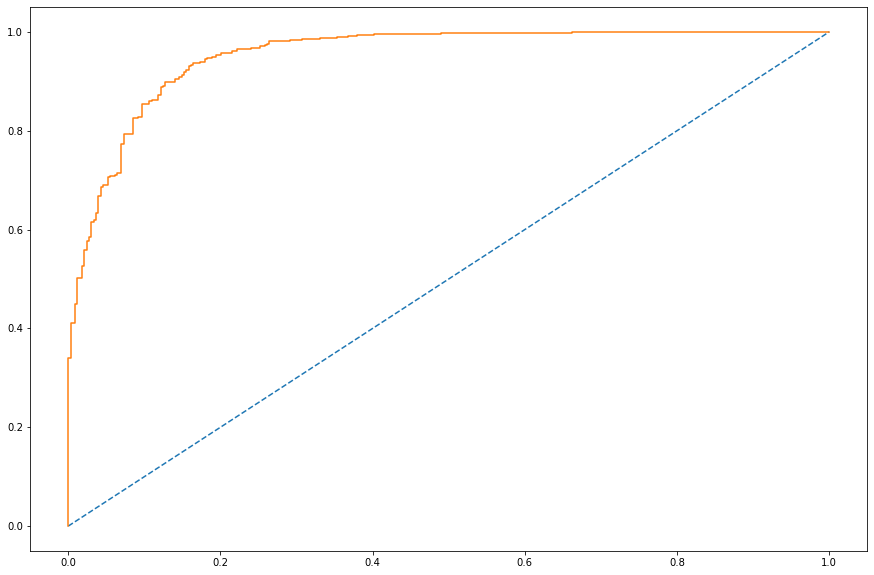

In [164]:
probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### ADA Boosting Test

In [165]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8748577929465301
[[ 54  90]
 [ 20 715]]
              precision    recall  f1-score   support

           0       0.73      0.38      0.50       144
           1       0.89      0.97      0.93       735

    accuracy                           0.87       879
   macro avg       0.81      0.67      0.71       879
weighted avg       0.86      0.87      0.86       879



### AUC _ROC Curve Boosting Test

AUC: 0.847


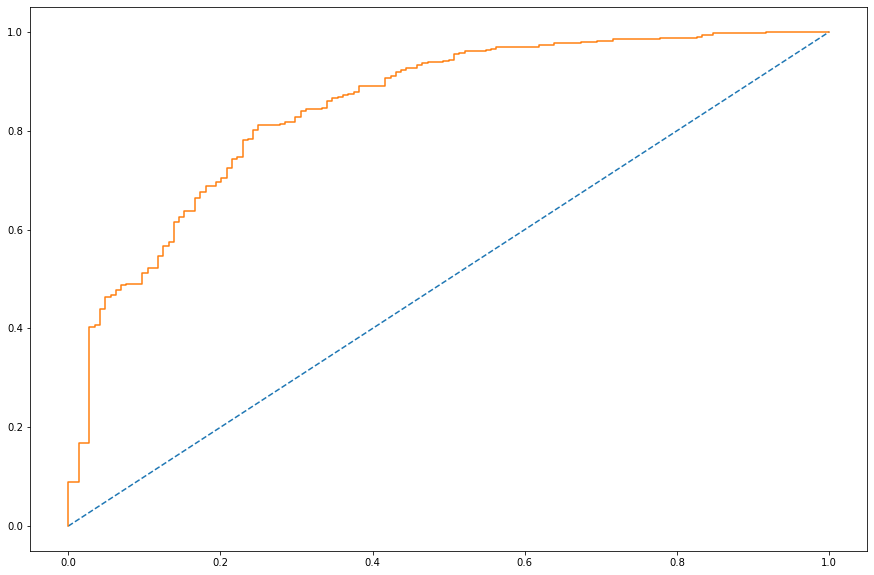

In [166]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Gradient Boosting Test

In [167]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8850967007963595
[[ 54  90]
 [ 11 724]]
              precision    recall  f1-score   support

           0       0.83      0.38      0.52       144
           1       0.89      0.99      0.93       735

    accuracy                           0.89       879
   macro avg       0.86      0.68      0.73       879
weighted avg       0.88      0.89      0.87       879



### Gradient Boosting AUC_ROC Curve Test

AUC: 0.903


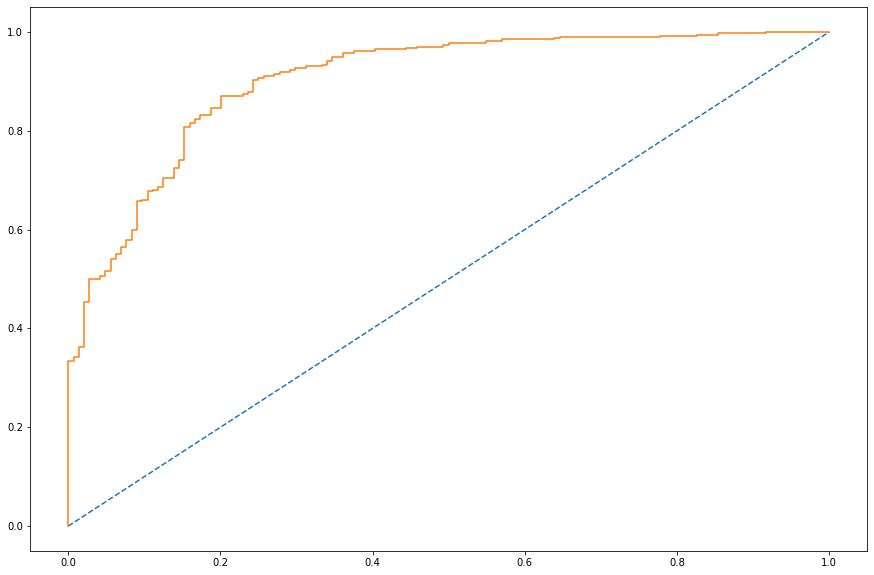

In [168]:
probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)